In [3]:
from __future__ import print_function
from matplotlib.pyplot import *
from pixell import enmap, enplot, fft
import numpy as np
import healpy as hp
import os, sys
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from soapack import interfaces as sints
import local

In [9]:
map_kwargs = dict(downgrade = 4, ticks = 20, colorbar = True)

In [6]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = 'ipython')

In [4]:
aobj = local.init_analysis_params(qid='boss_d03')

In [28]:
map_obs = enmap.read_map(aobj.fmap['s'][0])[0]

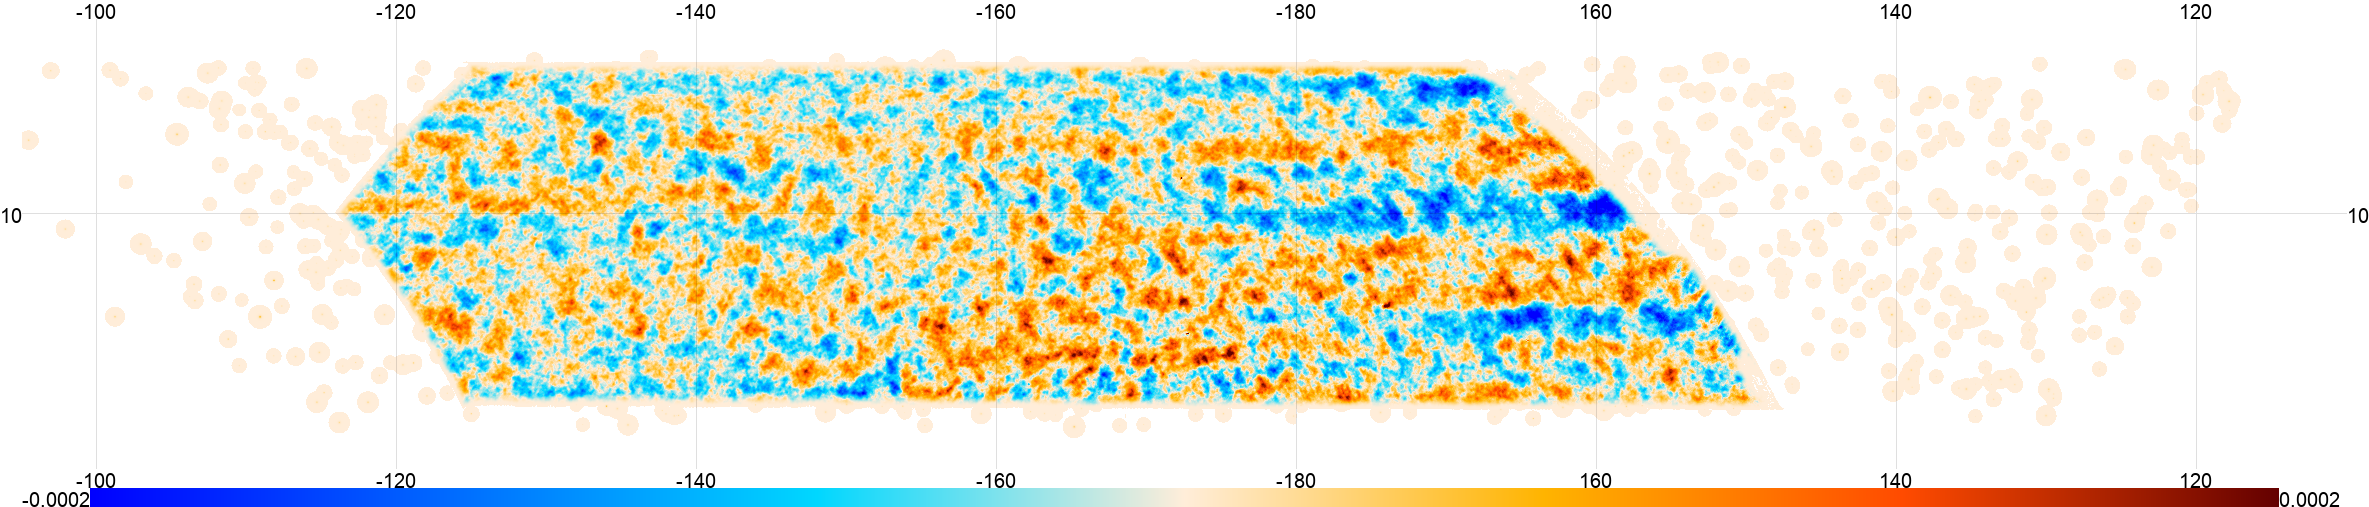

In [29]:
eshow(map_obs, mask = 0, mask_tol=1e-10, min=-2e-4,max=2e-4,**map_kwargs)

In [12]:
Tcmb = 2.72e6

In [13]:
f090 = enmap.read_map('data_local/input/S18d_202006_confirmed_model_f090.fits')

In [14]:
np.shape(f090)

(10320, 43200)

In [18]:
szmap = enmap.project(f090,map_obs.shape,map_obs.wcs)/local.Tcmb

In [21]:
print(np.max(szmap))

2.8886002052458847e-08


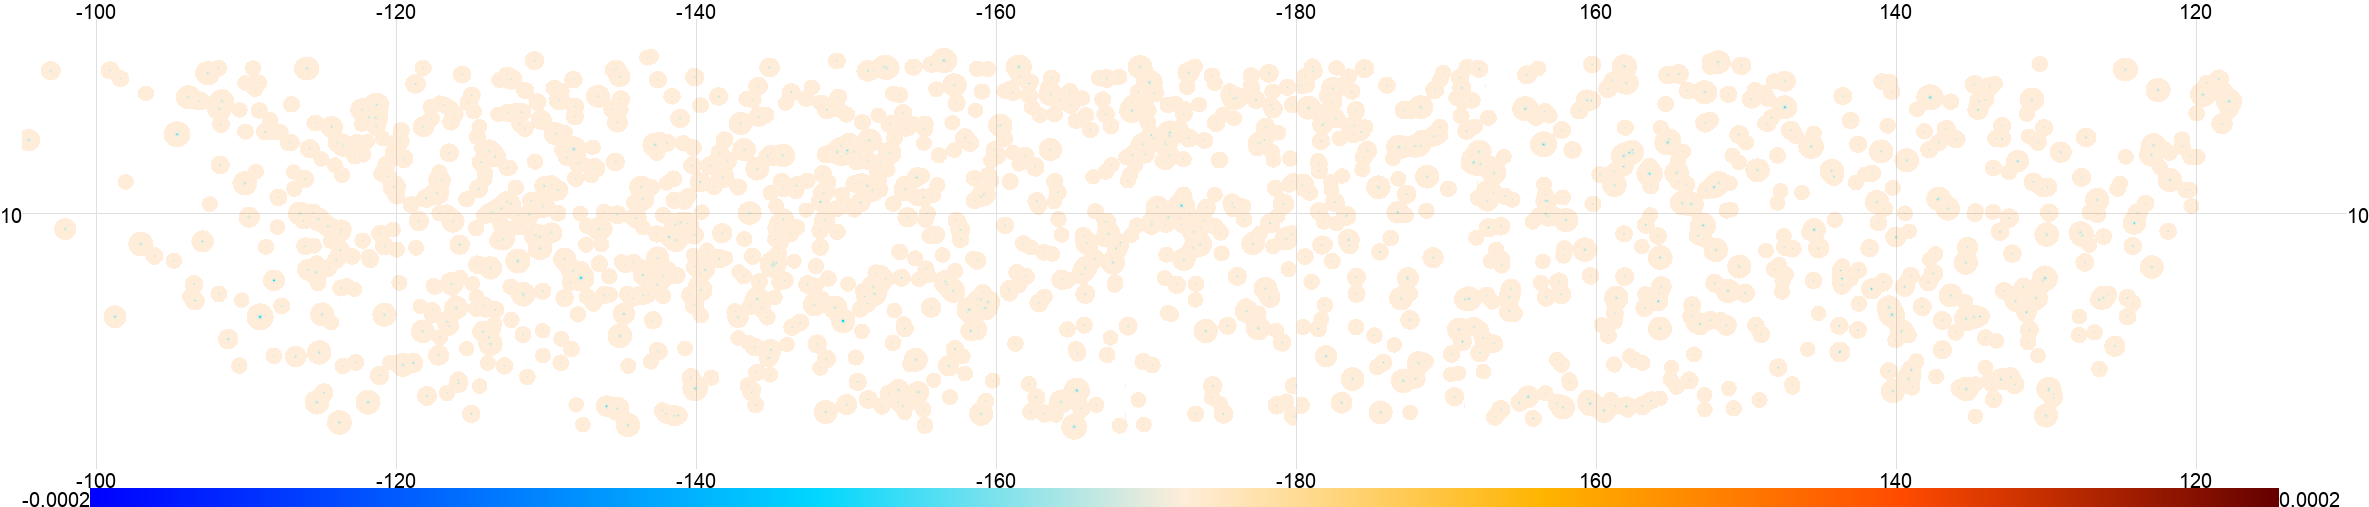

In [19]:
eshow(szmap, mask = 0, mask_tol=1e-10, min=-2e-4,max=2e-4,**map_kwargs)

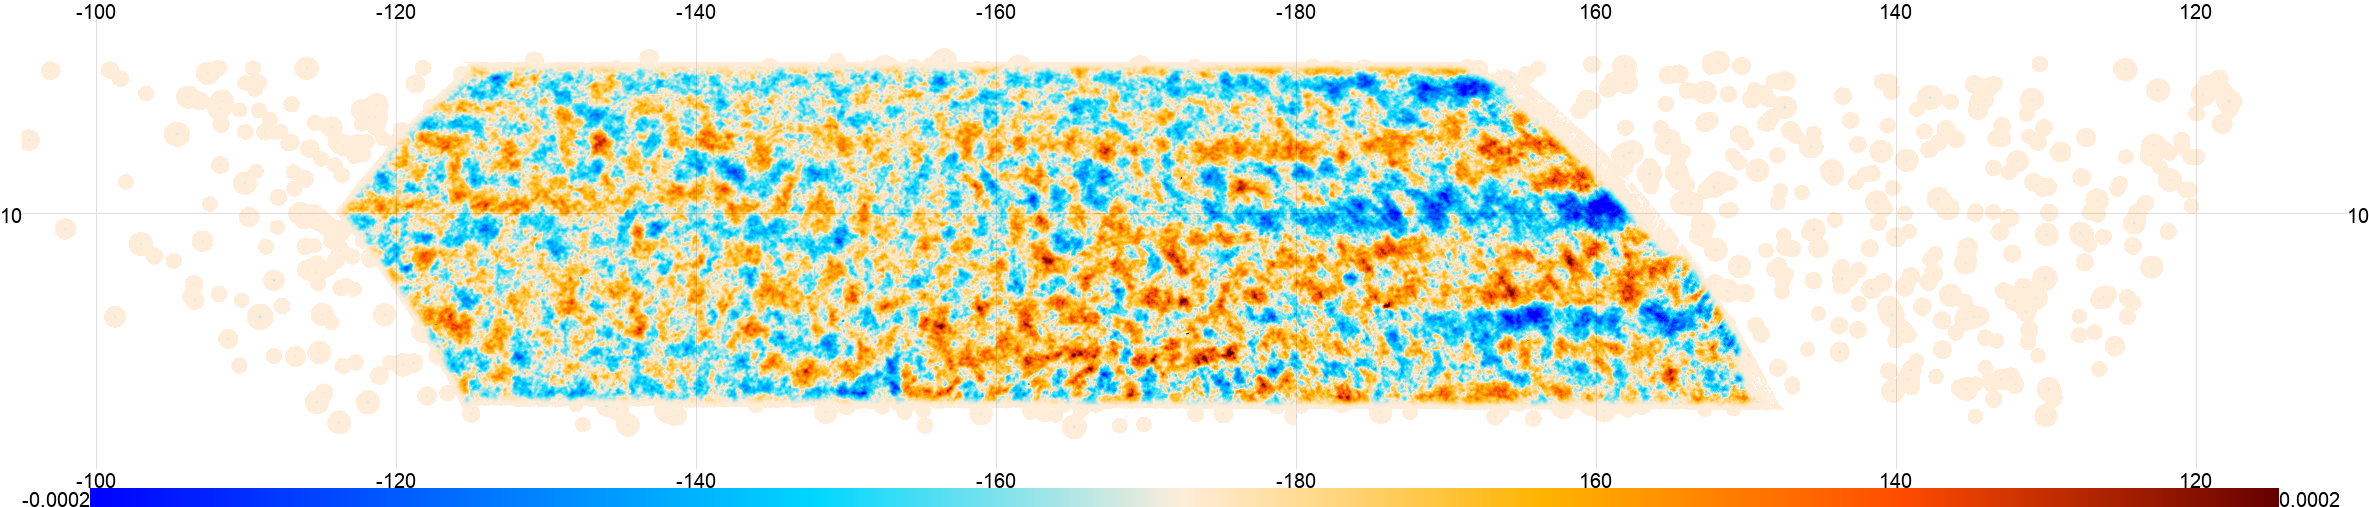

In [30]:
eshow(map_obs + szmap, mask = 0, mask_tol=1e-10, min=-2e-4,max=2e-4,**map_kwargs)

In [24]:
RAs, DECs = sints.get_act_mr3f_union_sources(version='20210209_sncut_10_aggressive') 
arcm = np.ones(len(RAs)) * 10.

In [25]:
nside = 2048
v = hp.pixelfunc.ang2vec(RAs, DECs, lonlat=True)
maskpt = np.ones(12*nside**2)
for i in range(len(arcm)):
    pix = hp.query_disc(nside, v[i], arcm[i]*np.pi/10800.)
    maskpt[pix] = 0.

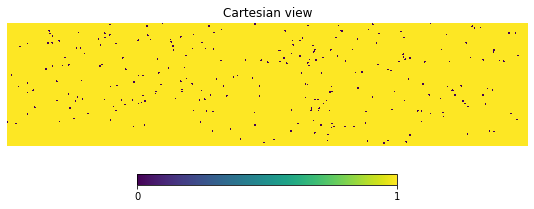

In [27]:
hp.cartview(maskpt,lonra=[145,250],latra=[-5,20])